# Plots of key dates


## Setup

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.ticker import LogLocator
import matplotlib.patches as mpatches

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import palettable.cmocean.sequential as cmOcSeq
import palettable.cmocean.diverging as cmOcDiv
import seaborn as sns

from datetime import datetime, timedelta

from glob import glob 

import utilsRegions as urgn
import utilsGen as utl
import mapPlots as mplt
import diagnostics as dgnst
import utlshistograms as uhist

%load_ext autoreload
%autoreload 2

In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(dashboard_address=':8188',n_workers=16, threads_per_worker=1)
client = Client(cluster)

http://127.0.0.1:8188/status

In [50]:
cluster.close()
client.close()

In [3]:
scenarios = ['historical-DFS-G510.00','RCP85-G510.14-G515.00-01']
hist,rcp85 = scenarios
periods = ['1981-2000','2023-2042','2066-2085']
past,pres,futur=periods
runs={past:hist, pres:rcp85, futur:rcp85}
timeperiod = {past: slice('1981','2000'), pres:slice('2023','2042'), futur: slice('2066','2085') }

dadic={}
datadir = '/tsanta/ahaddon/data/'
utl.loadNAAmesh(dadic)

### Load diagnostics

In [4]:
processDataDir = '/tsanta/ahaddon/NAA/processedData/'
# processDataDir = '/home/ahaddon/Work/NAA/processedData/'
# varsave = ['icedia','ileadfra2','fstric','iceno3','icenh4','icedia','limN','limpar']#,'iicethic','isnowthi''iceGPPfall'
varsave = ['iicethic','isnowthi']
clim={}
for per in periods: 
    scn=runs[per] 
    for var in varsave:
        clim[per+var] = xr.open_dataarray(f'{processDataDir}{scn}/panArctic/{var}_20yclim{per}_1d.nc')

In [5]:
climdiag={}
for per in periods:
    scn=runs[per] 
    climdiag[per] = xr.open_dataset(f'{processDataDir}{scn}/panArctic/IAdiagnostics_20yclim{per}.nc').compute()
climdiag[periods[0]]

<xarray.Dataset>
Dimensions:                 (y: 400, x: 568)
Coordinates:
    nav_lat                 (y, x) float32 53.41 53.48 53.56 ... 44.23 44.11
    nav_lon                 (y, x) float32 -132.6 -132.5 -132.4 ... 15.75 15.66
Dimensions without coordinates: y, x
Data variables: (12/22)
    doyNlim5                (y, x) float64 nan nan nan nan ... nan nan nan nan
    doyPARlim15             (y, x) float64 nan nan nan nan ... nan nan nan nan
    doyPARlim5              (y, x) float64 nan nan nan nan ... nan nan nan nan
    doySIbreak              (y, x) float64 nan nan nan nan ... nan nan nan nan
    doyPARlimGTnlim         (y, x) float64 nan nan nan nan ... nan nan nan nan
    least_lim               (y, x) float32 nan nan nan nan ... nan nan nan nan
    ...                      ...
    least_lim_nyears        (y, x) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    nonLimGwth_nyears       (y, x) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    lengthPAR_nyears        (y, x) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    doyIApeak_nyears        (y, x) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    doySIfreezeUp_nyears    (y, x) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    doyIAstd_nyears         (y, x) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0

In [ ]:
ltr=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


## Plot change in key dates

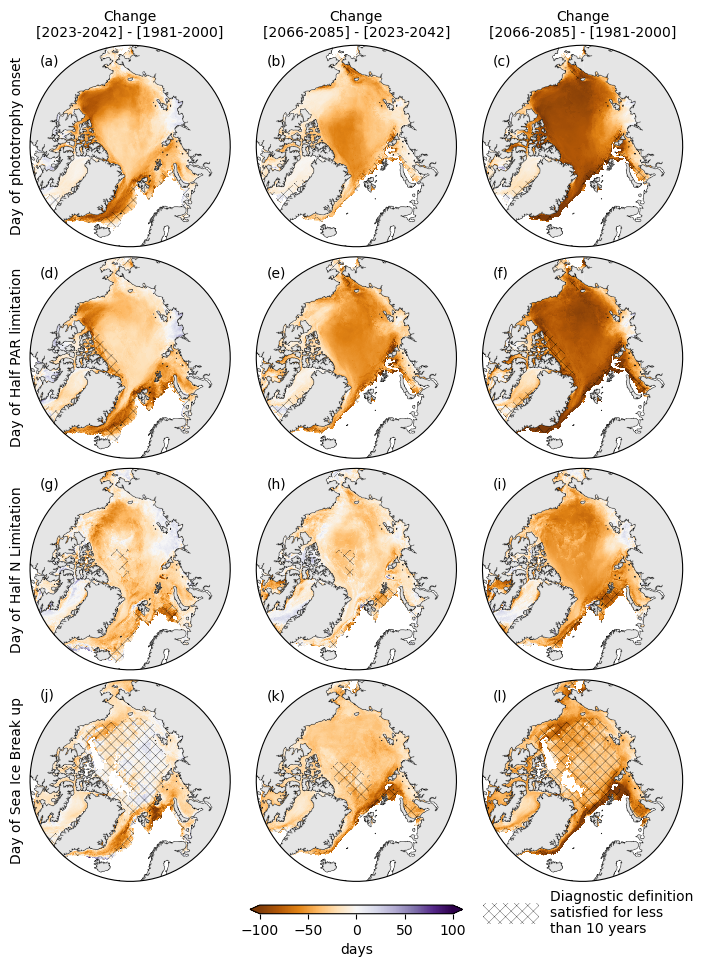

In [37]:
# fig,ax = mplt.initmaps(4,3,figsize=(13,18),rnd=True,extent=[-180,180, 62,90])
fig,ax = mplt.initmaps(4,3,figsize=(18/2.54,22/2.54),rnd=True,extent=[-180,180, 62,90])

# fig.suptitle('Change in key dates')#,fontsize=10)
fig.tight_layout()
fig.subplots_adjust(hspace=0.05,wspace=-0)

for il,a in enumerate(fig.axes): a.text(0.05,0.9,f'({ltr[il]})',transform=a.transAxes)

ax[0,0].text(-0.1,0.5, 'Day of phototrophy onset', rotation='vertical', transform=ax[0,0].transAxes, fontsize=10, verticalalignment='center')
ax[1,0].text(-0.1,0.5, 'Day of Half PAR limitation', rotation='vertical', transform=ax[1,0].transAxes, fontsize=10, verticalalignment='center')
ax[2,0].text(-0.1,0.5, 'Day of Half N Limitation', rotation='vertical', transform=ax[2,0].transAxes, fontsize=10, verticalalignment='center')
ax[3,0].text(-0.1,0.5, 'Day of Sea Ice Break up', rotation='vertical', transform=ax[3,0].transAxes, fontsize=10, verticalalignment='center')

for line,kdate in enumerate(['doyPARlim15','doyPARlim5','doyNlim5','doySIbreak']):

    for i in [1,2]:
        f,a,pl=mplt.singleMap(climdiag[periods[i]][kdate] - climdiag[past][kdate], 
                              dadic, fig=fig,ax=ax[line,(i-1)*2],  
                                  title=None, cbar=False, vmin=-100,vmax=100,
                                  cmap='PuOr',
                              hatchMsk=(climdiag[periods[i]][kdate+'_nyears']<10)|(climdiag[past][kdate+'_nyears']<10),  hatchlw=0.3,
                                   )
        if line==0 :ax[line,(i-1)*2].set_title(f'Change\n[{periods[i]}] - [{past}]', fontsize=10)

    f,a,pl=mplt.singleMap(climdiag[futur][kdate] - climdiag[pres][kdate], dadic, fig=fig,ax=ax[line,1],  
                          title=None, cbar=False, vmin=-100,vmax=100, #cmap='PuOr',
                          cmap='PuOr',
                          hatchMsk=(climdiag[futur][kdate+'_nyears']<10)|(climdiag[pres][kdate+'_nyears']<10), hatchlw=0.2,
                               )
    if line==0: ax[line,1].set_title(f'Change\n[{futur}] - [{pres}]', fontsize=10)

cbar_ax = fig.add_axes([0.5-0.15, -0.02, 0.3, 0.01])                               
cl = fig.colorbar(pl,cax=cbar_ax, extend='both', orientation='horizontal', shrink=0.4)
cl.set_label('days')
    
leg = cbar_ax.legend(loc='lower center', bbox_to_anchor=(1.7, -4), handlelength=4, frameon=False,
    handles=[mpatches.Patch(facecolor='w',hatch=r'xxx',label='Diagnostic definition\nsatisfied for less\nthan 10 years')])
leg.get_patches()[0].set_height(15)
leg.get_patches()[0].set_y(-4)

# plt.savefig('../figs/IAphenology23/keydateschange-300dpi.png',bbox_inches='tight',dpi=300)
# plt.savefig('../figs/IAphenology23/keydateschange-90dpi.png',bbox_inches='tight',dpi=90)

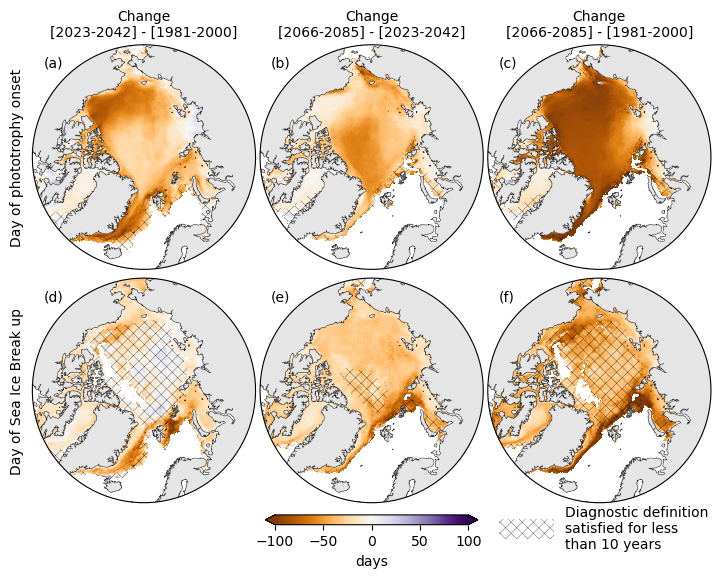

In [38]:
# fig,ax = mplt.initmaps(4,3,figsize=(13,18),rnd=True,extent=[-180,180, 62,90])
fig,ax = mplt.initmaps(2,3,figsize=(18/2.54,12.5/2.54),rnd=True,extent=[-180,180, 62,90])

# fig.suptitle('Change in key dates')#,fontsize=10)
fig.tight_layout()
fig.subplots_adjust(hspace=0.02,wspace=0.02)

for il,a in enumerate(fig.axes): a.text(0.05,0.9,f'({ltr[il]})',transform=a.transAxes)

ax[0,0].text(-0.1,0.5, 'Day of phototrophy onset', rotation='vertical', transform=ax[0,0].transAxes, fontsize=10, verticalalignment='center')
ax[1,0].text(-0.1,0.5, 'Day of Sea Ice Break up', rotation='vertical', transform=ax[1,0].transAxes, fontsize=10, verticalalignment='center')

for line,kdate in enumerate(['doyPARlim15','doySIbreak']):

    for i in [1,2]:
        f,a,pl=mplt.singleMap(climdiag[periods[i]][kdate] - climdiag[past][kdate], 
                              dadic, fig=fig,ax=ax[line,(i-1)*2],  
                                  title=None, cbar=False, vmin=-100,vmax=100,
                                  cmap='PuOr',
                              hatchMsk=(climdiag[periods[i]][kdate+'_nyears']<10)|(climdiag[past][kdate+'_nyears']<10),  hatchlw=0.3,
                                   )
        if line==0 :ax[line,(i-1)*2].set_title(f'Change\n[{periods[i]}] - [{past}]', fontsize=10)

    f,a,pl=mplt.singleMap(climdiag[futur][kdate] - climdiag[pres][kdate], dadic, fig=fig,ax=ax[line,1],  
                          title=None, cbar=False, vmin=-100,vmax=100, #cmap='PuOr',
                          cmap='PuOr',
                          hatchMsk=(climdiag[futur][kdate+'_nyears']<10)|(climdiag[pres][kdate+'_nyears']<10), hatchlw=0.2,
                               )
    if line==0: ax[line,1].set_title(f'Change\n[{futur}] - [{pres}]', fontsize=10)

cbar_ax = fig.add_axes([0.5-0.15, -0.01, 0.3, 0.02])                               
cl = fig.colorbar(pl,cax=cbar_ax, extend='both', orientation='horizontal', shrink=0.4)
cl.set_label('days')
    
leg = cbar_ax.legend(loc='lower center', bbox_to_anchor=(1.7, -4), handlelength=4, frameon=False,
    handles=[mpatches.Patch(facecolor='w',hatch=r'xxx',label='Diagnostic definition\nsatisfied for less\nthan 10 years')])
leg.get_patches()[0].set_height(15)
leg.get_patches()[0].set_y(-4)

plt.savefig('../figs/IAphenology23/photo+SIbreak-change-300dpi.png',bbox_inches='tight',dpi=300)
plt.savefig('../figs/IAphenology23/photo+SIbreak-change-90dpi.png',bbox_inches='tight',dpi=90)

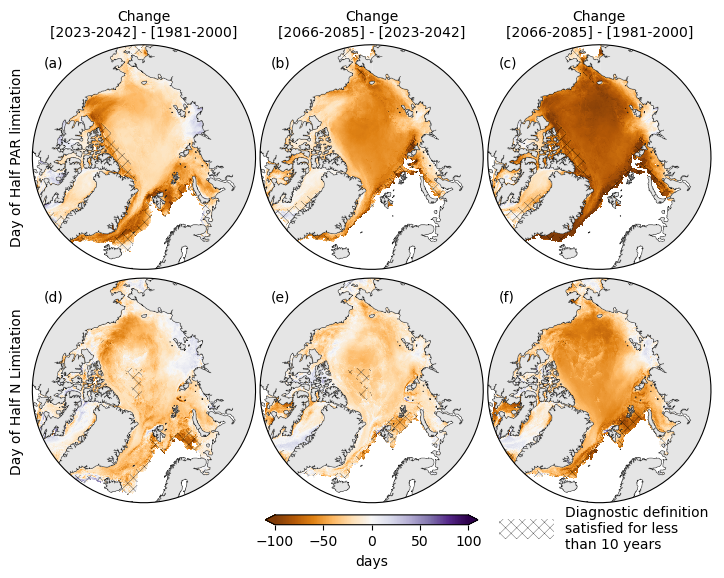

In [41]:
# fig,ax = mplt.initmaps(4,3,figsize=(13,18),rnd=True,extent=[-180,180, 62,90])
fig,ax = mplt.initmaps(2,3,figsize=(18/2.54,12.5/2.54),rnd=True,extent=[-180,180, 62,90])

# fig.suptitle('Change in key dates')#,fontsize=10)
fig.tight_layout()
fig.subplots_adjust(hspace=0.02,wspace=0.02)

for il,a in enumerate(fig.axes): a.text(0.05,0.9,f'({ltr[il]})',transform=a.transAxes)

ax[0,0].text(-0.1,0.5, 'Day of Half PAR limitation', rotation='vertical', transform=ax[0,0].transAxes, fontsize=10, verticalalignment='center')
ax[1,0].text(-0.1,0.5, 'Day of Half N Limitation', rotation='vertical', transform=ax[1,0].transAxes, fontsize=10, verticalalignment='center')

for line,kdate in enumerate(['doyPARlim5','doyNlim5']):

    for i in [1,2]:
        f,a,pl=mplt.singleMap(climdiag[periods[i]][kdate] - climdiag[past][kdate], 
                              dadic, fig=fig,ax=ax[line,(i-1)*2],  
                                  title=None, cbar=False, vmin=-100,vmax=100,
                                  cmap='PuOr',
                              hatchMsk=(climdiag[periods[i]][kdate+'_nyears']<10)|(climdiag[past][kdate+'_nyears']<10),  hatchlw=0.3,
                                   )
        if line==0 :ax[line,(i-1)*2].set_title(f'Change\n[{periods[i]}] - [{past}]', fontsize=10)

    f,a,pl=mplt.singleMap(climdiag[futur][kdate] - climdiag[pres][kdate], dadic, fig=fig,ax=ax[line,1],  
                          title=None, cbar=False, vmin=-100,vmax=100, #cmap='PuOr',
                          cmap='PuOr',
                          hatchMsk=(climdiag[futur][kdate+'_nyears']<10)|(climdiag[pres][kdate+'_nyears']<10), hatchlw=0.2,
                               )
    if line==0: ax[line,1].set_title(f'Change\n[{futur}] - [{pres}]', fontsize=10)

cbar_ax = fig.add_axes([0.5-0.15, -0.01, 0.3, 0.02])                               
cl = fig.colorbar(pl,cax=cbar_ax, extend='both', orientation='horizontal', shrink=0.4)
cl.set_label('days')
    
leg = cbar_ax.legend(loc='lower center', bbox_to_anchor=(1.7, -4), handlelength=4, frameon=False,
    handles=[mpatches.Patch(facecolor='w',hatch=r'xxx',label='Diagnostic definition\nsatisfied for less\nthan 10 years')])
leg.get_patches()[0].set_height(15)
leg.get_patches()[0].set_y(-4)

plt.savefig('../figs/IAphenology23/PAR+Nlim-change-300dpi.png',bbox_inches='tight',dpi=300)
plt.savefig('../figs/IAphenology23/PAR+Nlim-change-90dpi.png',bbox_inches='tight',dpi=90)

## Plot key dates

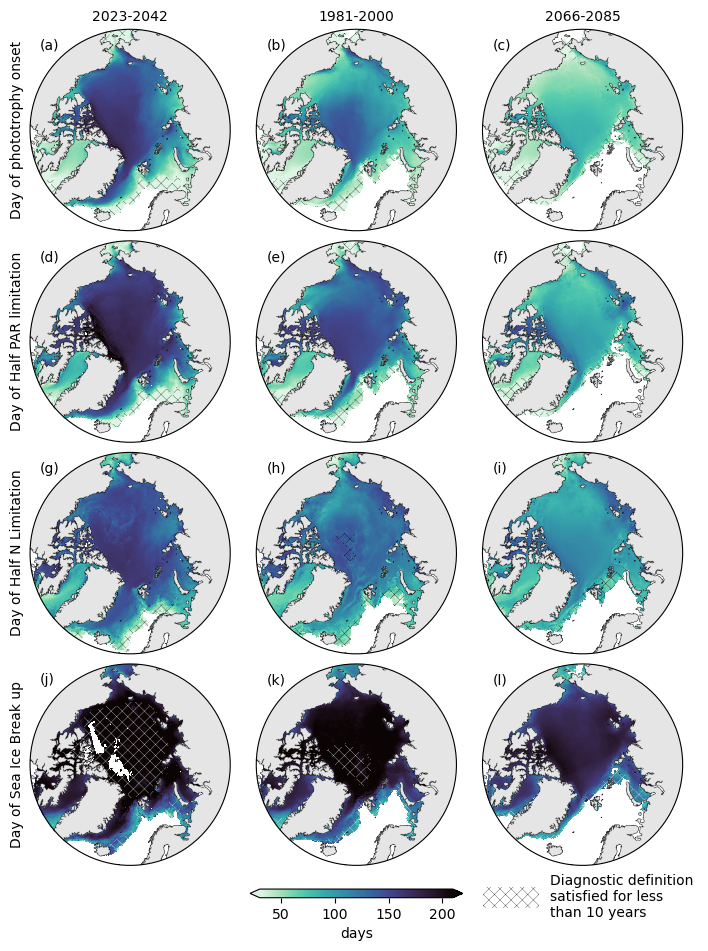

In [42]:
ltr=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
# plt.rcParams.update({'font.size': 9})

# fig,ax = mplt.initmaps(4,3,figsize=(13,18),rnd=True,extent=[-180,180, 62,90])
fig,ax = mplt.initmaps(4,3,figsize=(18/2.54,22/2.54),rnd=True,extent=[-180,180, 62,90])

# fig.suptitle('Change in key dates')#,fontsize=10)
fig.tight_layout()
fig.subplots_adjust(hspace=0.05,wspace=-0)

for il,a in enumerate(fig.axes): a.text(0.05,0.9,f'({ltr[il]})',transform=a.transAxes)

ax[0,0].text(-0.1,0.5, 'Day of phototrophy onset', rotation='vertical', transform=ax[0,0].transAxes, fontsize=10, verticalalignment='center')
ax[1,0].text(-0.1,0.5, 'Day of Half PAR limitation', rotation='vertical', transform=ax[1,0].transAxes, fontsize=10, verticalalignment='center')
ax[2,0].text(-0.1,0.5, 'Day of Half N Limitation', rotation='vertical', transform=ax[2,0].transAxes, fontsize=10, verticalalignment='center')
ax[3,0].text(-0.1,0.5, 'Day of Sea Ice Break up', rotation='vertical', transform=ax[3,0].transAxes, fontsize=10, verticalalignment='center')

for line,kdate in enumerate(['doyPARlim15','doyPARlim5','doyNlim5','doySIbreak']):

    for i,per in enumerate(periods):
        f,a,pl=mplt.singleMap(climdiag[per][kdate], dadic, fig=fig,ax=ax[line,i], cbar=False, 
                              vmin=30,vmax=210, cmap = sns.color_palette("mako_r", as_cmap=True),
                              hatchMsk=climdiag[per][kdate+'_nyears']<10, hatchlw=0.2, hatchColor='w' if kdate=='doySIbreak' else 'k',
                             )

        if line==0 :ax[line,(i-1)*2].set_title(per, fontsize=10)

cbar_ax = fig.add_axes([0.5-0.15, -0.02, 0.3, 0.01])                               
cl = fig.colorbar(pl,cax=cbar_ax, extend='both', orientation='horizontal', shrink=0.4)
cl.set_label('days')
    
leg = cbar_ax.legend(loc='lower center', bbox_to_anchor=(1.7, -4), handlelength=4, frameon=False,
    handles=[mpatches.Patch(facecolor='w',hatch=r'xxx',label='Diagnostic definition\nsatisfied for less\nthan 10 years')])
leg.get_patches()[0].set_height(15)
leg.get_patches()[0].set_y(-4)

plt.savefig('../figs/IAphenology23/keydates-panArctic-300dpi.png',bbox_inches='tight',dpi=300)
plt.savefig('../figs/IAphenology23/keydates-panArctic-90dpi.png',bbox_inches='tight',dpi=90)

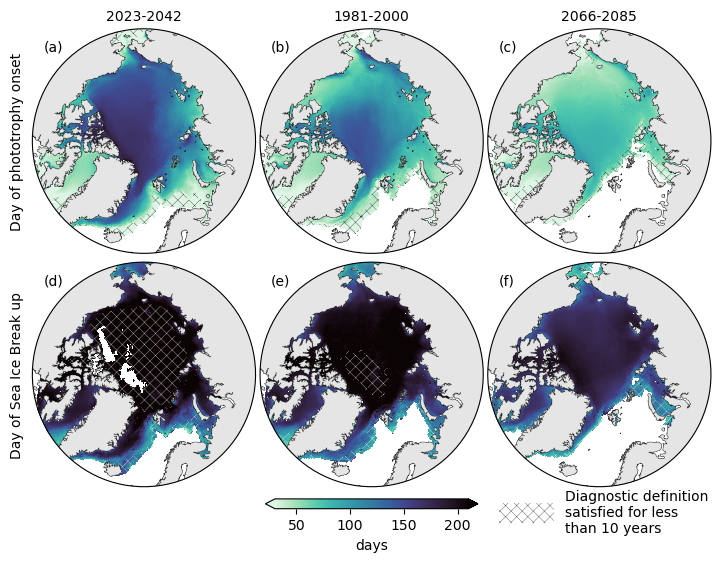

In [43]:
# fig,ax = mplt.initmaps(4,3,figsize=(13,18),rnd=True,extent=[-180,180, 62,90])
fig,ax = mplt.initmaps(2,3,figsize=(18/2.54,12.5/2.54),rnd=True,extent=[-180,180, 62,90])

fig.tight_layout()
fig.subplots_adjust(hspace=0.02,wspace=0.02)

for il,a in enumerate(fig.axes): a.text(0.05,0.9,f'({ltr[il]})',transform=a.transAxes)

ax[0,0].text(-0.1,0.5, 'Day of phototrophy onset', rotation='vertical', transform=ax[0,0].transAxes, fontsize=10, verticalalignment='center')
ax[1,0].text(-0.1,0.5, 'Day of Sea Ice Break up', rotation='vertical', transform=ax[1,0].transAxes, fontsize=10, verticalalignment='center')

for line,kdate in enumerate(['doyPARlim15','doySIbreak']):

   for i,per in enumerate(periods):
        f,a,pl=mplt.singleMap(climdiag[per][kdate], dadic, fig=fig,ax=ax[line,i], cbar=False, 
                              vmin=30,vmax=210, cmap = sns.color_palette("mako_r", as_cmap=True),
                              hatchMsk=climdiag[per][kdate+'_nyears']<10, hatchlw=0.2, hatchColor='w' if kdate=='doySIbreak' else 'k',
                             )

        if line==0 :ax[line,(i-1)*2].set_title(per, fontsize=10)

cbar_ax = fig.add_axes([0.5-0.15, -0.01, 0.3, 0.02])                               
cl = fig.colorbar(pl,cax=cbar_ax, extend='both', orientation='horizontal', shrink=0.4)
cl.set_label('days')
    
leg = cbar_ax.legend(loc='lower center', bbox_to_anchor=(1.7, -4), handlelength=4, frameon=False,
    handles=[mpatches.Patch(facecolor='w',hatch=r'xxx',label='Diagnostic definition\nsatisfied for less\nthan 10 years')])
leg.get_patches()[0].set_height(15)
leg.get_patches()[0].set_y(-4)

plt.savefig('../figs/IAphenology23/photo+SIbreak-300dpi.png',bbox_inches='tight',dpi=300)
plt.savefig('../figs/IAphenology23/photo+SIbreak-90dpi.png',bbox_inches='tight',dpi=90)

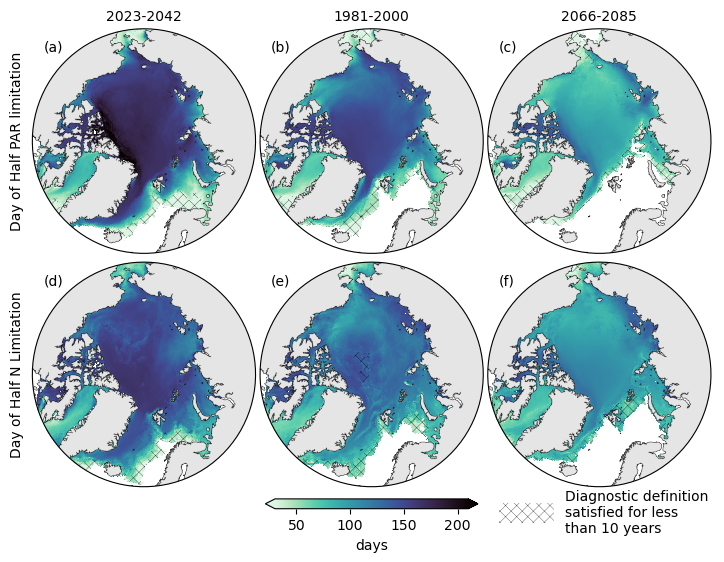

In [44]:
# fig,ax = mplt.initmaps(4,3,figsize=(13,18),rnd=True,extent=[-180,180, 62,90])
fig,ax = mplt.initmaps(2,3,figsize=(18/2.54,12.5/2.54),rnd=True,extent=[-180,180, 62,90])

# fig.suptitle('Change in key dates')#,fontsize=10)
fig.tight_layout()
fig.subplots_adjust(hspace=0.02,wspace=0.02)

for il,a in enumerate(fig.axes): a.text(0.05,0.9,f'({ltr[il]})',transform=a.transAxes)

ax[0,0].text(-0.1,0.5, 'Day of Half PAR limitation', rotation='vertical', transform=ax[0,0].transAxes, fontsize=10, verticalalignment='center')
ax[1,0].text(-0.1,0.5, 'Day of Half N Limitation', rotation='vertical', transform=ax[1,0].transAxes, fontsize=10, verticalalignment='center')

for line,kdate in enumerate(['doyPARlim5','doyNlim5']):

    for i,per in enumerate(periods):
        f,a,pl=mplt.singleMap(climdiag[per][kdate], dadic, fig=fig,ax=ax[line,i], cbar=False, 
                              vmin=30,vmax=210, cmap = sns.color_palette("mako_r", as_cmap=True),
                              hatchMsk=climdiag[per][kdate+'_nyears']<10, hatchlw=0.2, hatchColor='w' if kdate=='doySIbreak' else 'k',
                             )

        if line==0 :ax[line,(i-1)*2].set_title(per, fontsize=10)

cbar_ax = fig.add_axes([0.5-0.15, -0.01, 0.3, 0.02])                               
cl = fig.colorbar(pl,cax=cbar_ax, extend='both', orientation='horizontal', shrink=0.4)
cl.set_label('days')
    
leg = cbar_ax.legend(loc='lower center', bbox_to_anchor=(1.7, -4), handlelength=4, frameon=False,
    handles=[mpatches.Patch(facecolor='w',hatch=r'xxx',label='Diagnostic definition\nsatisfied for less\nthan 10 years')])
leg.get_patches()[0].set_height(15)
leg.get_patches()[0].set_y(-4)

plt.savefig('../figs/IAphenology23/PAR+Nlim-300dpi.png',bbox_inches='tight',dpi=300)
plt.savefig('../figs/IAphenology23/PAR+Nlim-90dpi.png',bbox_inches='tight',dpi=90)